This file just does some basic loading of the data and creates a few plots from the raw data.

The loading of the data has been moved into its own function in helpers.py, see below for usage.

# Loading data
This block just loads the data for both plants.

The datetimes are converted to numpy datetime64.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import os
import sys
module_path = os.path.abspath(".")
sys.path.insert(0, module_path)
from helpers import load_data

plant1, plant2, weather1, weather2 = load_data()

# Weather data

In [2]:
weather1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0


## Temperature plots

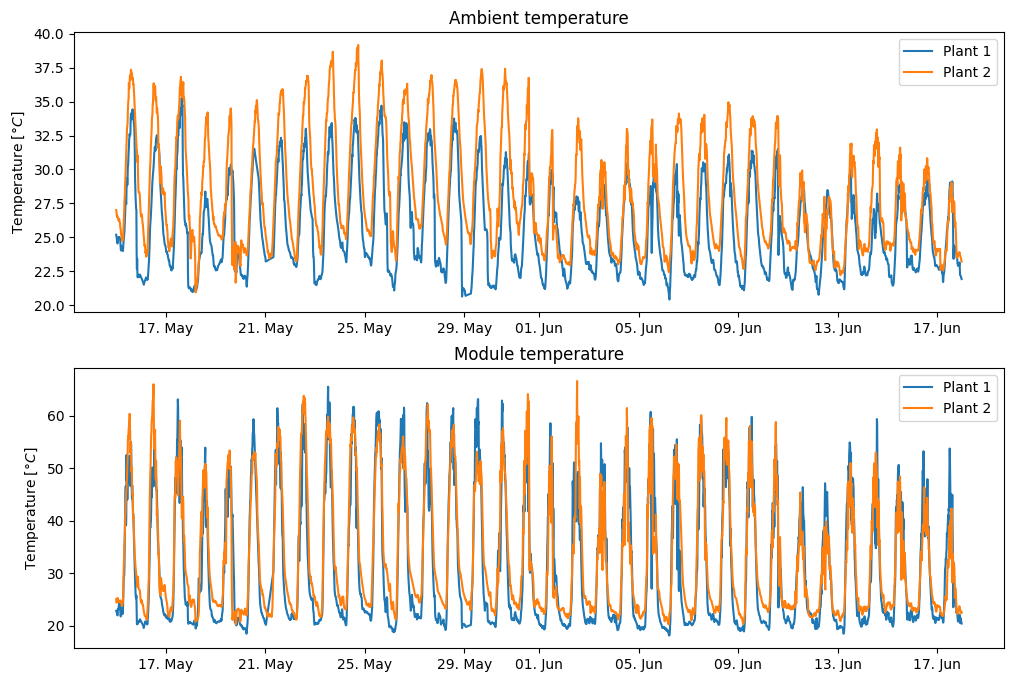

In [3]:
plt.figure(figsize=(12, 8))

# Ambient temperature plot
plt.subplot(2, 1, 1)
plt.title("Ambient temperature")
plt.ylabel(r"Temperature $[\degree C]$")
plt.plot(weather1["DATE_TIME"], weather1["AMBIENT_TEMPERATURE"], label="Plant 1")
plt.plot(weather2["DATE_TIME"], weather2["AMBIENT_TEMPERATURE"], label="Plant 2")
plt.legend()
plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%d. %b"))

# Module temperature plot
plt.subplot(2, 1, 2)
plt.title("Module temperature")
plt.ylabel(r"Temperature $[\degree C]$")
plt.plot(weather1["DATE_TIME"], weather1["MODULE_TEMPERATURE"], label="Plant 1")
plt.plot(weather2["DATE_TIME"], weather2["MODULE_TEMPERATURE"], label="Plant 2")
plt.legend()
plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%d. %b"))


## Irradiation plot

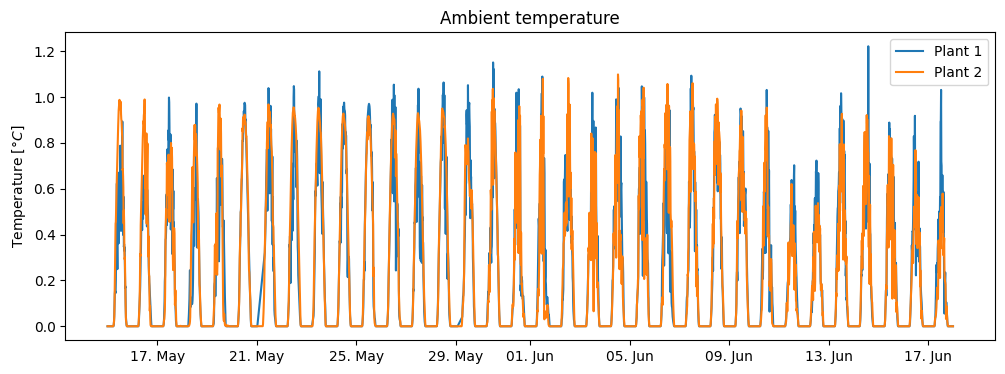

In [4]:
plt.figure(figsize=(12, 4))

# Irradiation plot
plt.title("Ambient temperature")
plt.ylabel(r"Temperature $[\degree C]$")
plt.plot(weather1["DATE_TIME"], weather1["IRRADIATION"], label="Plant 1")
plt.plot(weather2["DATE_TIME"], weather2["IRRADIATION"], label="Plant 2")
plt.legend()
plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%d. %b"))

# Plant data

The plant data set consist of:
- DATE_TIME
- PLANT_ID
- SOURCE_KEY
- DC_POWER
- AC_POWER
- DAILY_YIELD
- TOTAL_YIELD

In [15]:
plant1.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0


How many inverters do we have on each plant?

In [7]:
inverters1 = plant1["SOURCE_KEY"].nunique()
inverters2 = plant1["SOURCE_KEY"].nunique()
print(f"Plant 1 has {inverters1} inverters, and plant 2 has {inverters2} inverters.")

Plant 1 has 22 inverters, and plant 2 has 22 inverters.


## Power plots

Below plots the AC & DC power for each inverter for plant 1, during a single day. The interval can be changed in the plt.xlim() function, or removed for plotting of the entire dataset.

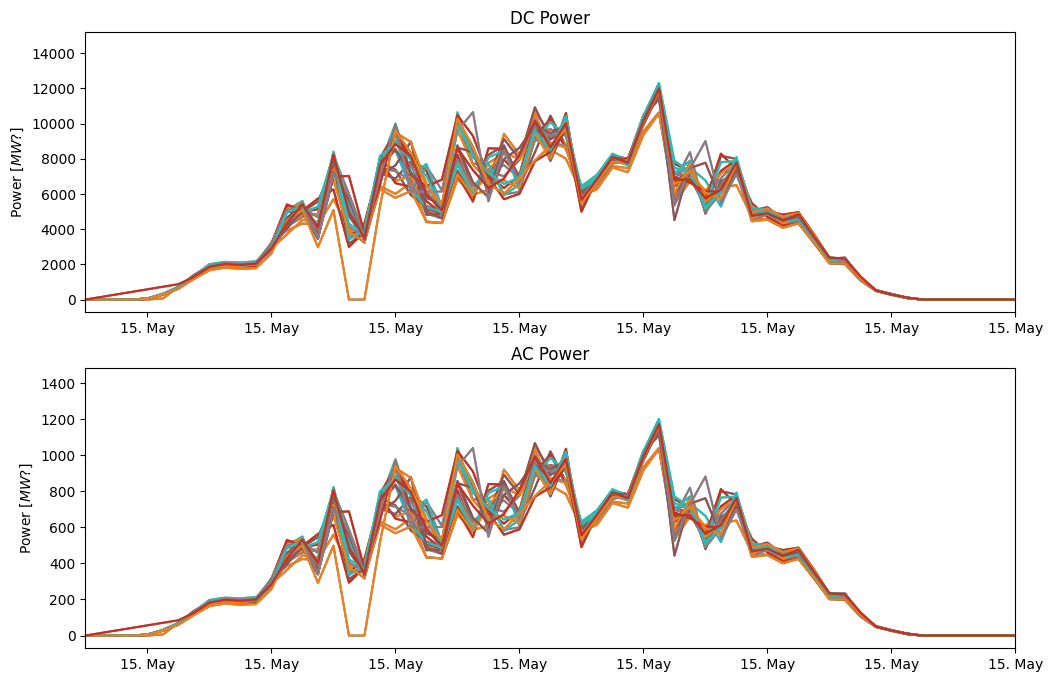

In [27]:
plt.figure(figsize=(12, 8))

for i, key in enumerate(plant1["SOURCE_KEY"].unique()):
    inverter = plant1[plant1["SOURCE_KEY"] == key]
    time = inverter["DATE_TIME"]
    dc_power = inverter["DC_POWER"]
    ac_power = inverter["AC_POWER"]
    
    # Ambient temperature plot
    plt.subplot(2, 1, 1)
    plt.title("DC Power")
    plt.ylabel(r"Power $[MW?]$")
    plt.plot(time, dc_power)
    plt.plot(time, dc_power)
    plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%d. %b"))
    plt.xlim(np.datetime64("2020-05-15T05:00:00"), np.datetime64("2020-05-15T20:00:00"))
    
    # Module temperature plot
    plt.subplot(2, 1, 2)
    plt.title("AC Power")
    plt.ylabel(r"Power $[MW?]$")
    plt.plot(time, ac_power)
    plt.plot(time, ac_power)
    plt.gca().xaxis.set_major_formatter(dates.DateFormatter("%d. %b"))
    plt.xlim(np.datetime64("2020-05-15T05:00:00"), np.datetime64("2020-05-15T20:00:00"))